## **proyek analisis data : E-commerce-public-dataset.zip**
Nama : Wina Ayang Sari

Email : winaayangsari@gmail.com

id Dicoding :

# **Menentukan Pertanyaan Bisnis**


1.   Negara mana yang menjadi kustomer terbanyak?
2.   Produk yang paling sering diorder?



# **Menyiapkan library yang dibutuhkan**

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# **Data Wrangling**

**Gatering data**

In [103]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/farishuwaidi/visualisasiprodukdankustomer/main/dashboard/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [104]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/farishuwaidi/visualisasiprodukdankustomer/main/dashboard/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [105]:
order_items = pd.read_csv("https://raw.githubusercontent.com/farishuwaidi/visualisasiprodukdankustomer/main/dashboard/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [106]:
product_category = pd.read_csv("https://raw.githubusercontent.com/farishuwaidi/visualisasiprodukdankustomer/main/dashboard/product_category_name_translation.csv")
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [107]:
product_dataset = pd.read_csv("https://raw.githubusercontent.com/farishuwaidi/visualisasiprodukdankustomer/main/dashboard/products_dataset.csv")
product_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# **assessing data**
menilai tabel **customers**

menilai tabel **geololocation**

In [46]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


menilai tabel **order**

In [47]:
order_items.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [48]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [49]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())

Jumlah duplikasi:  0


menilai tabel **product**

In [50]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [51]:
product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [52]:
print("Jumlah duplikasi: ", product_category.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [54]:
product_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
print("Jumlah duplikasi: ", product_dataset.duplicated().sum())

Jumlah duplikasi:  0


menilai tabel **seller**

# **cleaning data**

missing value

In [55]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [56]:
product_dataset.dropna(inplace=True)

In [58]:
product_dataset.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

# Exploratory Data Analysis (EDA)

explor **customer_df**

In [59]:
customers_df.sample(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
34833,7cc995918b7c4560b0f7ec54ef108d83,b813fe59b2d10fb59d5594ec8f91750e,5716,sao paulo,SP
18813,27445a8aa8d9efc8dca27a651b61533b,d95e736f831986871d6bb98ff914e9a9,38410,uberlandia,MG
97835,3f045735fd30e3e9900dc9fe56d05bbd,5d6043efeaeabd4391ba677793e67b91,5223,sao paulo,SP
81619,416b9ec8dfb172a88631c946b7f4ab85,8dcf2096a68ce8212a3f534ab31ee23e,98175,jari,RS
32125,359f96dc9ce1e693327d4fe6060508eb,d9a0eef3c2ded2c8666b15563cde72d9,9070,santo andre,SP


In [60]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [61]:
customers_df.customer_id.is_unique

True

In [62]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [63]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [64]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

explor geolocation

In [65]:
geolocation_df.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
384665,18190,-23.500234,-47.613611,araçoiaba da serra,SP
161284,6473,-23.481900,-46.867671,barueri,SP
655113,38748,-18.957935,-46.985745,patrocinio,MG
492070,25901,-22.654341,-43.037798,mage,RJ
184387,7193,-23.446004,-46.498241,guarulhos,SP
256464,11520,-23.898164,-46.422652,cubatao,SP
147294,5868,-23.670001,-46.781583,sao paulo,SP
681667,42850,-12.622799,-38.299842,dias d'ávila,BA
218888,9060,-23.669953,-46.546120,santo andre,SP
879242,85802,-24.971185,-53.473693,cascavel,PR


In [66]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [67]:
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_state
SP    6349
MG    1868
RJ    1390
RS    1132
PR    1046
BA     992
GO     773
SC     620
PE     596
CE     548
DF     516
PB     324
ES     315
MA     313
PA     309
PI     307
RN     280
MT     254
MS     242
TO     184
AL     178
AM     144
SE     135
RO     108
AC      46
RR      28
AP      26
Name: geolocation_zip_code_prefix, dtype: int64

In [68]:
customer_state_counts= customers_df['customer_city'].value_counts()
print("Customer_state paling banyak:")
print(customer_state_counts.idxmax(), "-", customer_state_counts.max())

Customer_state paling banyak:
sao paulo - 15540


In [69]:
print("\nCustomer_state paling sedikit:")
print(customer_state_counts.idxmin(), "-", customer_state_counts.min())


Customer_state paling sedikit:
virginia - 1


EXPLOR **ORDER** **ITEMS**

In [70]:
order_items.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
83598,bde06a769a934fd5e54ef3a8019a4e72,1,62a6991adbb1e60f5c03a77fae5568ff,cee48807215b30a12ca2ca10ffb5f250,2018-01-04 17:51:12,199.90,43.81
42863,6196411f3e5ffd34a1a630d44d8396f2,1,c3ba4e8d3cb30049213b682e751e9d00,6560211a19b47992c3666cc44a7e94c0,2017-12-29 02:12:35,95.00,14.42
13815,1f6ddbae00fc6acbc0457caa5fd89ad1,1,4c973b1f6f4357bcdcd7598abe7912bc,59b22a78efb79a4797979612b885db36,2017-09-13 09:45:42,1099.00,26.55
73606,a7c26d6524d448da94b7ad45ad722167,1,c0aed8767e46cce56e77db0ceef83035,cda598c48d7c614bc1cad7d8ff6f0010,2018-03-26 23:48:00,79.90,18.44
17500,281e6230f2de05d273019e23988c6496,1,8844bd4b8ca8f93603694ca2bceb77e9,cc419e0650a3c5ba77189a1882b7556a,2017-12-01 21:14:32,84.99,20.08
53467,79af690e1f308a4aa1052a6fc4fbc908,1,5ad2fee5f3e327f898435c3fcb0c93bd,080102cd0a76b09e0dcf55fcacc60e05,2018-06-18 18:18:51,48.90,23.06
109825,f9981828f2a400a48939ca9ec5233c91,2,9a29b754b7fc0aa8eeb990103fcea4fc,0bf0150d5b9d60d9cd2906003332f085,2018-03-13 15:30:55,149.90,27.13
98975,e08f76fed43c999d57979d1879871ce1,1,cea0783f5748d01abec8fd268dccba49,a416b6a846a11724393025641d4edd5e,2017-02-01 16:48:24,89.57,15.39
3873,08c21d8b98beec294f0dceb8b54cdfd5,1,416095891c3eb407eb70756068f7837f,d9a84e1403de8da0c3aa531d6d108ba6,2018-04-24 11:51:54,34.90,18.23
71458,a2f7984f0b3604184f39c1d5a93813fb,1,42a2c92a0979a949ca4ea89ec5c7b934,813348c996469b40f2e028d5429d3495,2017-11-17 02:10:26,58.90,17.12


In [71]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**EXPLORE PRODUCT CATEGORY**

In [72]:
product_category.sample(10)

,product_category_name,product_category_name_english
12,papelaria,stationery
5,esporte_lazer,sports_leisure
22,cool_stuff,cool_stuff
43,construcao_ferramentas_iluminacao,construction_tools_lights
11,bebes,baby
20,audio,audio
35,casa_conforto,home_confort
48,livros_interesse_geral,books_general_interest
37,agro_industria_e_comercio,agro_industry_and_commerce
4,moveis_decoracao,furniture_decor


In [73]:
product_category.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**EXPLORE PRODUCT DATASET**

In [74]:
product_dataset.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
28413,71fa3ded050dac9c89b71383bbe4df76,fashion_calcados,40.0,303.0,12.0,400.0,29.0,7.0,16.0
11053,dfb97c88e066dc22165f31648efe1312,automotivo,53.0,597.0,1.0,5417.0,47.0,44.0,44.0
18158,1a46dafd2935eadb540039ce3e8a3d29,consoles_games,35.0,771.0,2.0,350.0,17.0,16.0,20.0
29965,f76a9967d2129cda56d7b3be6cb5c9cf,telefonia,58.0,637.0,2.0,183.0,17.0,4.0,12.0
8494,a9028257171c93a8d948ff95a0082b0d,eletronicos,25.0,351.0,2.0,550.0,17.0,8.0,16.0


In [75]:
product_dataset.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "product_photos_qty": "sum"
})

,product_id,product_photos_qty
product_category_name,,
agro_industria_e_comercio,74,171.0
alimentos,82,159.0
alimentos_bebidas,104,197.0
artes,55,119.0
artes_e_artesanato,19,57.0
...,...,...
sinalizacao_e_seguranca,93,231.0
tablets_impressao_imagem,9,27.0
telefonia,1134,3129.0


**EXPLORE SELLERS DATASET**

# **Visualization & Explanatory Analysis**

##pertantanyaan 1
bagaimana persebaran costumer di setiap wilayah?

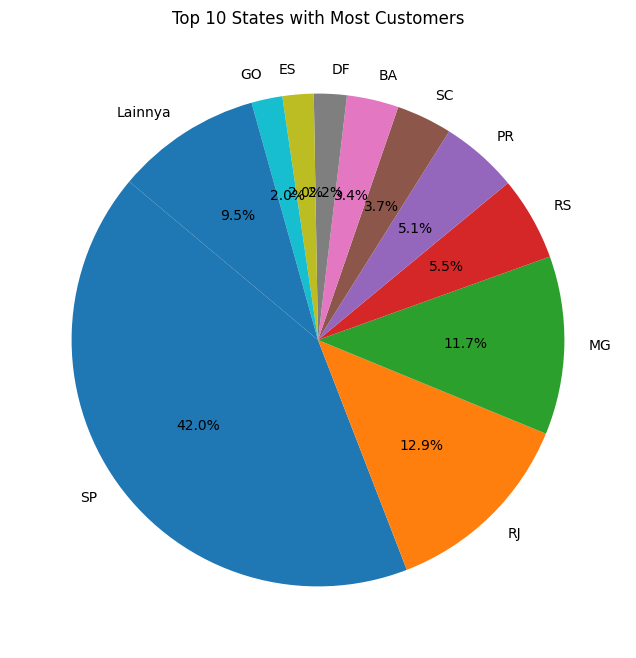

In [94]:
import matplotlib.pyplot as plt

# Ambil 10 negara dengan pelanggan terbanyak
top_10_states = customers_df['customer_state'].value_counts().nlargest(10)

# Ambil nama-nama negara pada 10 teratas
top_10_names = top_10_states.index.tolist()

# Hitung total pelanggan di 10 negara teratas
top_10_total = top_10_states.sum()

# Hitung jumlah pelanggan dari negara-negara lainnya
other_total = len(customers_df) - top_10_total

# Jumlah pelanggan negara-negara lain dimasukkan ke dalam kategori "Lainnya"
other_states = customers_df[~customers_df['customer_state'].isin(top_10_names)]
other_states_count = other_states['customer_state'].value_counts().sum()

# Buat list jumlah pelanggan untuk 10 negara teratas dan kategori "Lainnya"
top_states_counts = top_10_states.tolist()
top_states_counts.append(other_states_count)

# Buat list label untuk 10 negara teratas dan kategori "Lainnya"
labels = top_10_names + ['Lainnya']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_states_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 States with Most Customers')
plt.show()

##pertanyaan 2 produk yang paling sering di order

In [95]:
merged_data = pd.merge(order_items, product_dataset, on='product_id')

In [96]:
product_order_count = merged_data['product_category_name'].value_counts()

In [102]:
print("Produk paling sering di order:")
print(product_order_count.idxmax(), "-", product_order_count.max())

Produk paling sering di order:
cama_mesa_banho - 11115


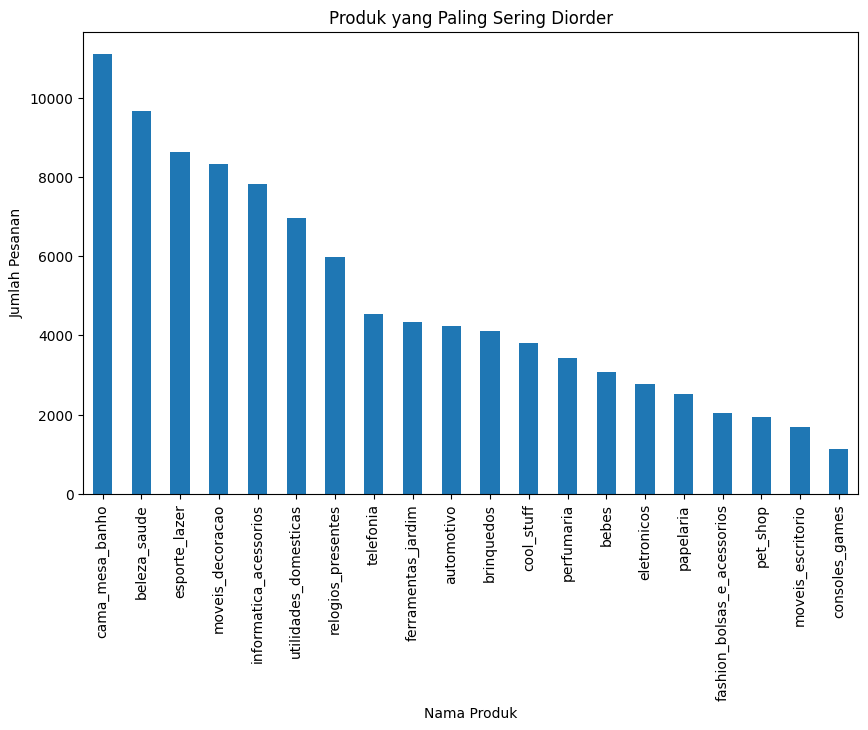

In [99]:
import matplotlib.pyplot as plt

# Ambil 20 produk dengan pesanan terbanyak
top_20_products = product_order_count.nlargest(20)

# Membuat histogram
plt.figure(figsize=(10, 6))
top_20_products.plot(kind='bar')
plt.title('Produk yang Paling Sering Diorder')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Pesanan')
plt.show()

##**Conclusion**

### **Negara mana yang menjadi kustomer terbanyak?**

*   Dari visualisasi yang ditampilkan pada paichart dapat dilihat bahwa negara dengan kode SP memiliki persentase kustomer paling besar dibanding negara lain yaitu mencapai 42%



### **produk yang paling sering diorder?**


*   Histogram produk paling sering di order menunjukan bahwa produk mama_mesa_banho merupakan produk yang paling banyak sering di order oleh customer sebanyak 11115 kali


